<div style="display: flex; text-align:center; background-color: RGB(58,69,203);border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto;color:RGB(255,255,255); padding: 30px;margin-left: 2em; text-indent: -2em">A/B TESTING PROJECT
    
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(58,69,203);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="00">SOMMAIRE</a> </h3>
    
  - 1. **[INTRODUCTION](#1)**
    
  - 2. **[PREPARATION DE DONNEES](#2)**
     - 1. [Importation des librairies et declaration de fonctions](#21)
     - 2. [Qualité des données](#22)
     - 3. [Nettoyage des données](#23)
  
  - 3. **[ANALYSES DESCRIPTIVES](#3)**
     - 1. [Analyses univariées](#31)
     - 2. [Analyses bivariées](#32)
    
  - 4. **[A/B TEST](#4)**
     - 1. [Test](#41)
     - 2. [Recommandations](#42)
    
  - 5. **[CONCLUSION](#5)**
</div>


<div style="background-color: RGB(58,69,203);" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">1 - INTRODUCTION</h2>
</div>

"Cookie Cats" est un jeu mobile de puzzle extrêmement populaire développé par Tactile Entertainment.<br>C’est un jeu de puzzle classique de type "connectez trois" où le joueur doit relier des tuiles de la même couleur pour vider le plateau et gagner le niveau.<br> 

Au fur et à mesure de la progression des joueurs dans le jeu, ils rencontrent des portails qui les obligent à attendre un certain temps avant de continuer ou à effectuer un achat intégré.<br>

Dans ce projet, nous analyserons les résultats d’un test A/B où le premier portail dans "Cookie Cats" a été déplacé du niveau 30 au niveau 40.<br> Nous examinerons en particulier l’impact de ce changement sur la rétention des joueurs et le nombre de manches jouées.

<div style="background-color: RGB(58,69,203);" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">2 - PREPARATION DE DONNEES</h2>
</div>

<div style="border: 1px solid RGB(58,69,203);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="11">1 - 1. Importation des librairies et declaration de fonctions</a></h3>
</div>

In [26]:
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
# Base
# -----------------------------------
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_row',100)

In [37]:
# Requirements

import matplotlib
import scipy

# Récupérer les versions des bibliothèques
versions = [
    f"pandas=={pd.__version__}",
    f"numpy=={np.__version__}",
    f"seaborn=={sns.__version__}",
    f"matplotlib=={matplotlib.__version__}",
    f"scipy=={scipy.__version__}"
]

# Écrire dans un fichier .txt
with open("requirements.txt", "w") as file:
    file.write("\n".join(versions))

print("Les versions ont été écrites dans 'requirements.txt'.")

# Lire et afficher le contenu du fichier
with open("requirements.txt", "r") as file:
    content = file.read()

print("Contenu du fichier requirements.txt :")
print(content)

Les versions ont été écrites dans 'requirements.txt'.
Contenu du fichier requirements.txt :
pandas==1.3.4
numpy==1.26.4
seaborn==0.11.2
matplotlib==3.4.3
scipy==1.6.2


In [40]:
# Declaration d'une fonction A/B Testing - Solution rapide

#Methode

#Hypothèse:
#---Vérifier la normalité
#---Si distribution normale, vérifier l'homogénéité

#Steps:
#---Diviser et définir le groupe de contrôle et le groupe de test
#---Appliquer le test de Shapiro pour la normalité
#---Si paramétrique, appliquer le test de Levene pour l'homogénéité des variances
#---Si paramétrique + homogénéité des variances, appliquer le test T
#---Si paramétrique - homogénéité des variances, appliquer le test de Welch
#---Si non paramétrique, appliquer directement le test de Mann Whitney U
#---Formater le resultat pour la présentation 

def AB_Test(dataframe, group, target):
    
    # Packages
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp

<div style="border: 1px solid RGB(58,69,203);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="12">1 - 2. Qualité des données</a></h3>
</div>

In [42]:
ab = pd.read_csv(".\data\input\cookie_cats.csv")
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [43]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


1. **userid :** Numero unique qui identifie chaque joueur.
2. **version :** Indication sur le groupe d’appartenance des joueurs :</br>
Groupe de contrôle : gate_30 - un portail situé au niveau 30.</br>
Groupe de test : gate_40 - un portail situé au niveau 40..
3. **sum_gamerounds :** Le nombre de manches jouées par le joueur au cours de la première semaine après l'installation.
4. **retention_1 :** Le joueur est-il revenu jouer 1 jour après l'installation ?
5. **retention_7 :** Le joueur est-il revenu jouer 7 jour après l'installation ?


#### DONNEES MANQUANTES

In [44]:
ab.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Nous n'avons pas de données manquantes

#### VALEURS EXTREMES

In [45]:
# Nombre de joueurs unique
print(ab.userid.nunique() == ab.shape[0])
#  Stats recapitulatives : sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [46]:
#Groupes A/B et statistiques récapitulatives
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


Interpretation</br>
gate_30 : L'écart-type (256.71) est presque 5 fois supérieur à la moyenne (52.46), ce qui montre une grande dispersion. </br>La valeur maximale (49854) est énorme comparée à la moyenne, suggérant une possible valeur extrême.</br>
gate_40 : L'écart-type (103.29) est 2 fois la moyenne (51.30), ce qui montre une dispersion plus faible.</br> La valeur maximale (2640) est élevée, mais bien moins disproportionnée par rapport à gate_30.

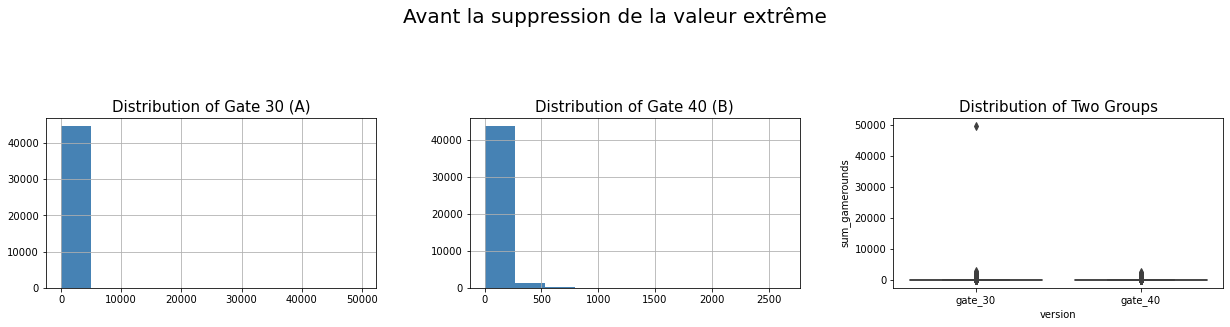

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = ab.version, y = ab.sum_gamerounds, ax = axes[2])

plt.suptitle("Avant la suppression de la valeur extrême", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

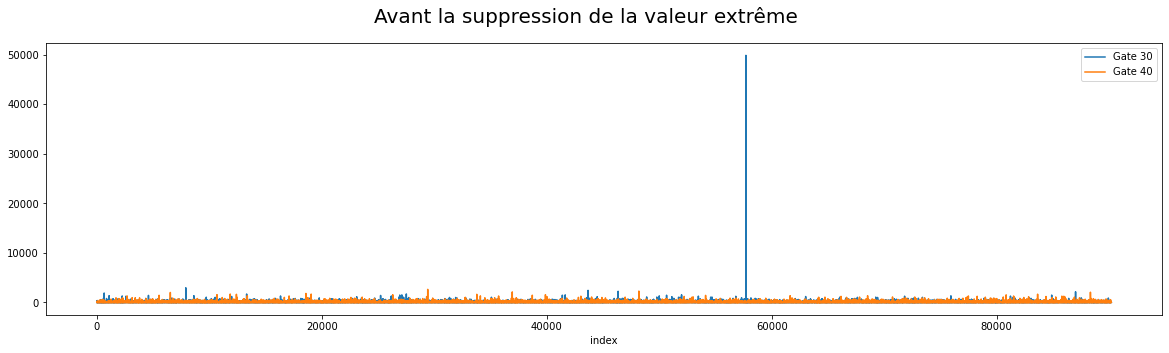

In [48]:
ab[ab.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Avant la suppression de la valeur extrême", fontsize = 20);

Interpretation</br>
On observe bien que Gate_30 a une valeur extrême . Nous la supprimons pour la suite de l'analyse

In [49]:
# suppression de l'outlier
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Summary Stats: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


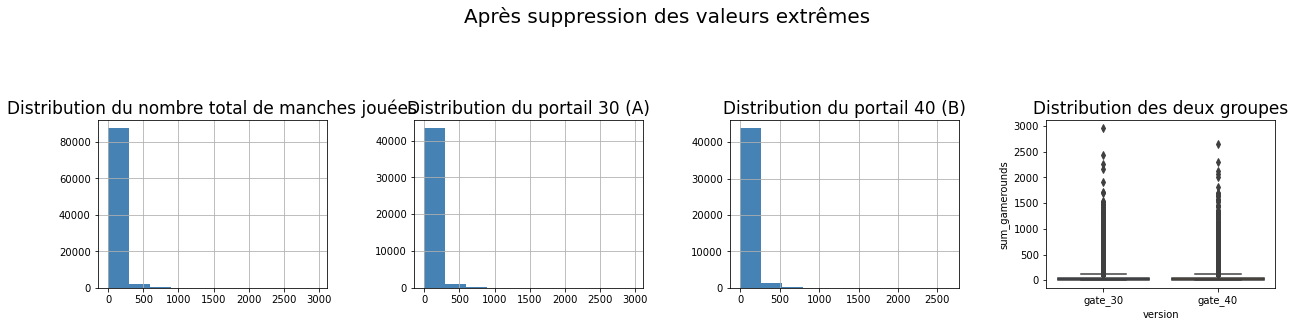

In [50]:
fig, axes = plt.subplots(1, 4, figsize = (18,5))
ab.sum_gamerounds.hist(ax = axes[0], color = "steelblue")
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = ab.version, y = ab.sum_gamerounds, ax = axes[3])

plt.suptitle("Après suppression des valeurs extrêmes", fontsize = 20)
axes[0].set_title("Distribution du nombre total de manches jouées", fontsize = 17)
axes[1].set_title("Distribution du portail 30 (A)", fontsize = 17)
axes[2].set_title("Distribution du portail 40 (B)", fontsize = 17)
axes[3].set_title("Distribution des deux groupes", fontsize = 17)

plt.tight_layout(pad = 4);

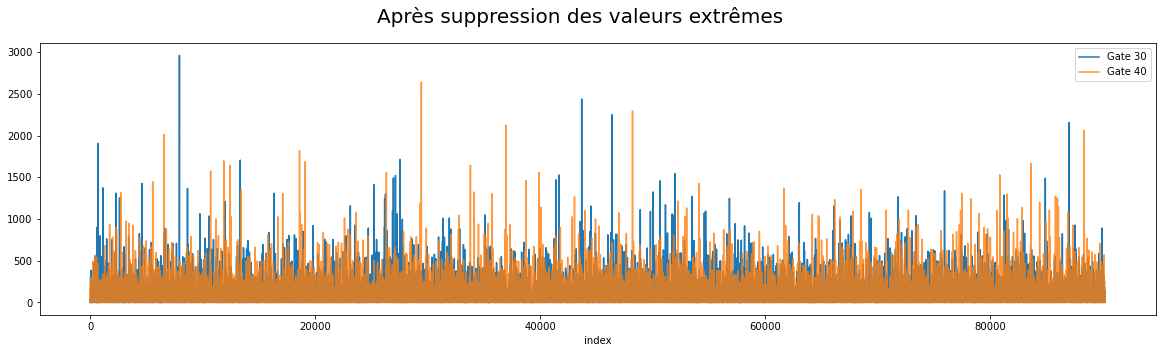

In [51]:
ab[(ab.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", alpha = 0.8)
plt.suptitle("Après suppression des valeurs extrêmes", fontsize = 20);

<div style="background-color: RGB(58,69,203);" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">3 - ANALYSES</h2>
</div>

#### COMPORTEMENTS DES JOUEURS

In [52]:
ab.groupby("sum_gamerounds").userid.count().reset_index().head(10)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


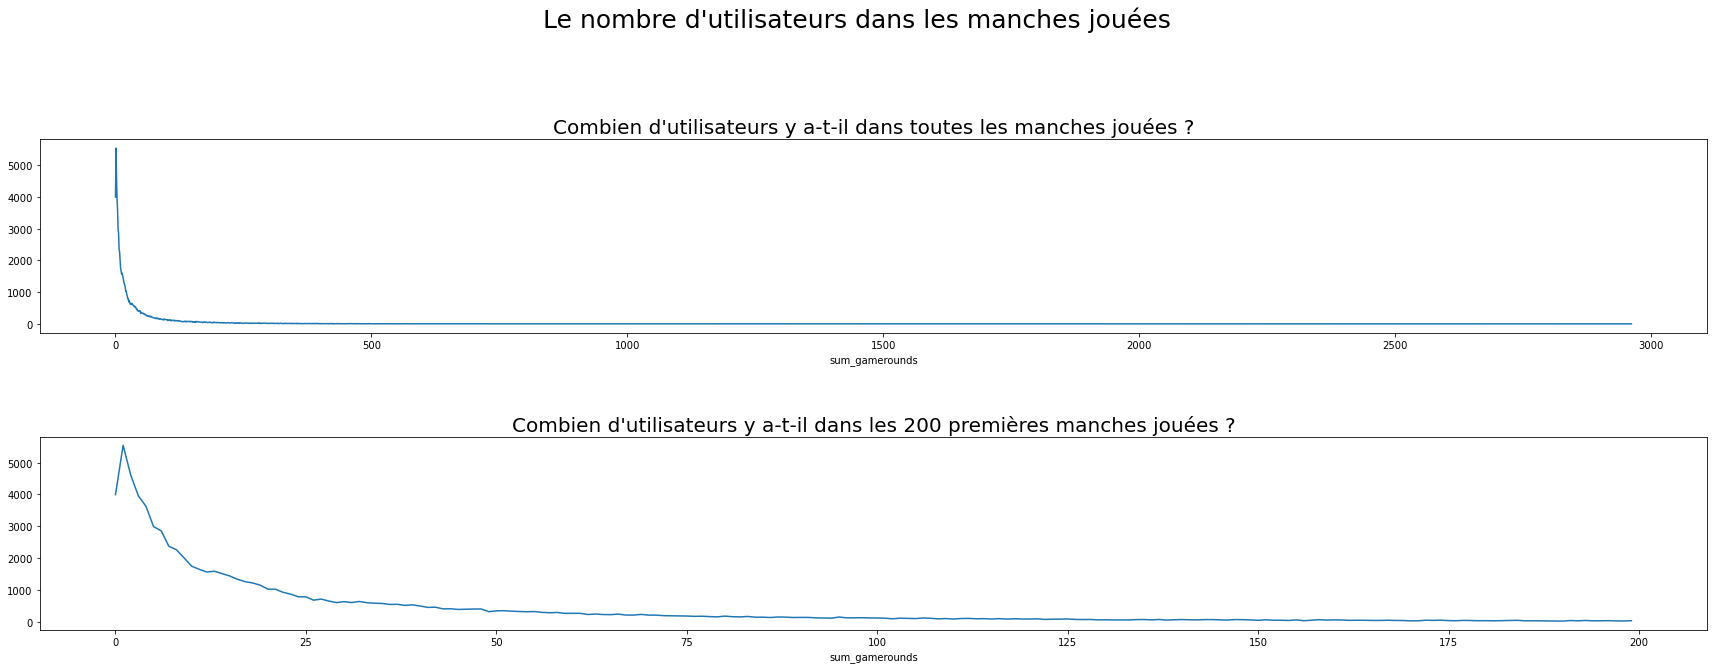

In [53]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
ab.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax = axes[1])
plt.suptitle("Le nombre d'utilisateurs dans les manches jouées", fontsize = 25)
axes[0].set_title("Combien d'utilisateurs y a-t-il dans toutes les manches jouées ?", fontsize = 20)
axes[1].set_title("Combien d'utilisateurs y a-t-il dans les 200 premières manches jouées ?", fontsize = 20)
plt.tight_layout(pad=5);

<a id='details'></a>
<h1 style="color:DarkSlateBlue" > QUELQUES COMMENTAIRES</h1>

**Les utilisateurs installent le jeu mais 3994 utilisateurs n'ont jamais joué !** Certaines raisons pourraient expliquer cette situation.

- Ils n'ont pas le temps libre pour jouer le jeu
- Les utilisateurs pourraient préférer jouer à d'autres jeux ou ils jouent déjà à d'autres jeux.
- Certains utilisateurs n'aiment pas l'application, etc.

**Le nombre d'utilisateurs diminue à mesure que les niveaux progressent**

- La plupart des utilisateurs ont joué au jeu à un stade précoce et n'ont pas progressé.
- Tactile Entertainment devrait comprendre pourquoi les utilisateurs abandonnent le jeu.
- Faire des recherches et collecter des données sur le jeu et les utilisateurs aiderait à comprendre l'abandon des utilisateurs.
- La difficulté du jeu peut être mesurée.
- Les cadeaux pourraient aider à la rétention des joueurs.

  ***Une analyse plus spécifique sur le problématique du "Users Churn" devrait être ménée pour comprendre le depart des joueurs.***

<div style="background-color: RGB(58,69,203);" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">4 - A/B TESTING</h2>
</div>

In [15]:
#Combien d'utilisateurs ont atteint les niveaux portail 30 et portail 40 ?
ab.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

En examinant les statistiques récapitulatives, les groupes de contrôle et de test semblent similaires, mais ces deux groupes sont-ils statistiquement significatifs ? Nous allons examiner cela d'un point de vue statistique.

In [16]:
# Statistiques descriptives des groupe de contrôle et de test
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


**Les variables de rétention nous donnent des détails sur la rétention des joueurs.**

<li><code>retention_1</code> - le joueur est-il revenu jouer 1 jour après l'installation ?</li> <li><code>retention_7</code> - le joueur est-il revenu jouer 7 jours après l'installation ?</li>



In [17]:
# Le problème de retention
pd.DataFrame({"RET1_COUNT": ab["retention_1"].value_counts(),
              "RET7_COUNT": ab["retention_7"].value_counts(),
              "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),
              "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.5548,0.8139
True,40153,16780,0.4452,0.1861


Les joueurs ont tendance à ne pas jouer au jeu ! Il y a de nombreux joueurs qui quittent le jeu.

55 % des joueurs n'ont pas joué au jeu 1 jour après l'installation.</br>
81 % des joueurs n'ont pas joué au jeu 7 jours après l'installation.

In [18]:
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [19]:
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

En examinant les statistiques récapitulatives des variables de rétention par version et en les comparant avec sum_gamerounds, il y a des similitudes entre les groupes. Cependant, il serait plus utile de déterminer s'il existe une différence statistiquement significative.

Des résultats similaires sont observés concernant le nombre d'utilisateurs qui sont revenus ou non 1 jour et 7 jours après l'installation du jeu. Environ 12 000 utilisateurs parmi le total des utilisateurs ont joué au jeu à la fois 1 jour et 7 jours après l'installation. 14 % des utilisateurs totaux incluent des personnes qui continueront à jouer à l'avenir.

In [20]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

Lorsque les variables de rétention sont combinées et que les deux groupes sont comparés, les statistiques récapitulatives sont également similaires ici.

In [21]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6.0000,11.8197,21.6426,981
1,gate_30,False-True,1825,43.0000,73.1693,93.2223,1072
2,gate_30,True-False,13358,33.0000,49.6945,58.1254,918
3,gate_30,True-True,6676,127.0000,183.8863,189.6264,2961
4,gate_40,False-False,23597,6.0000,11.9133,20.9010,547
5,gate_40,False-True,1773,47.0000,75.2611,94.4780,1241
6,gate_40,True-False,13613,32.0000,50.0255,60.9246,2640
7,gate_40,True-True,6506,133.0000,190.2824,194.2201,2294


<a id='ab'></a>
<h1 style="color:DarkSlateBlue" >METHODE A/B TESTING </h1>

### Hypothèses:
- Vérifier la normalité
- Si distribution normale, vérifier l'homogénéité

### Steps:
- Diviser et définir le groupe de contrôle et le groupe de test
- Appliquer le test de Shapiro pour la normalité
- Si paramétrique, appliquer le test de Levene pour l'homogénéité des variances
- Si paramétrique + homogénéité des variances, appliquer le test T
- Si paramétrique - homogénéité des variances, appliquer le test de Welch
- Si non paramétrique, appliquer directement le test de Mann Whitney U


In [54]:
# Definir les groupes A/B 
ab["version"] = np.where(ab.version == "gate_30", "A", "B")
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [23]:
# Appliquons la fonction AB_Test -  A/B Testing
AB_Test(dataframe=ab, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.0254,A/B groups are not similar!


### Interpretation du resultat
En résultat, le test de Mann Whitney U nous donne une P-value de 0.0254 < 0.05 ,
nous rejetons l'hypothèse nulle et concluons que les groupes A/B ne sont pas similaires !

### Quel niveau présente plus d'avantages en termes de rétention des joueurs ?


In [24]:
ab.groupby("version").retention_1.mean(), ab.groupby("version").retention_7.mean()

(version
 A   0.4482
 B   0.4423
 Name: retention_1, dtype: float64,
 version
 A   0.1902
 B   0.1820
 Name: retention_7, dtype: float64)

**La rétention moyenne à 1 jour et à 7 jours est plus élevée lorsque le portail est au niveau 30 plutôt qu'au niveau 40.**

<div style="background-color: RGB(58,69,203);" >
<h2 style="margin: auto;color:RGB(255,255,255) ;padding: 20px;margin-left: 4.5em; text-indent: -4.5em">5 - CONCLUSION</h2>
</div>



### Rappelez-vous le problème commercial !

**À mesure que les joueurs progressent dans le jeu, ils rencontrent des portails qui les obligent à attendre un certain temps avant de pouvoir progresser ou effectuer un achat dans l'application. Dans ce projet, nous analyserons le résultat d'un test A/B où le premier portail dans Cookie Cats a été déplacé du niveau 30 au niveau 40. En particulier, nous analyserons l'impact sur la rétention des joueurs et les manches de jeu.**

Tout d'abord, nous avons étudié les relations et structures dans les données. Il n'y avait pas de problème de valeurs manquantes, mais un problème de valeurs aberrantes dans les données. Les statistiques récapitulatives et les graphiques nous ont aidés à comprendre les données et le problème.

Avant le test A/B, nous avons partagé des détails sur le jeu, les joueurs, les problèmes .</br>
Nous avons suggeré au CODIR l'ouverture d'une analyse "Users Churn" spécifique pour mieux comprendre l'attrition des clients.

Après avoir appliqué le test A/B, les résultats de l'analyse nous ont donné des informations importantes. Le test de Shapiro a rejeté l'hypothèse nulle pour l'hypothèse de normalité. Par conséquent, nous avons dû appliquer un test non paramétrique appelé Mann Whitney U pour comparer les deux groupes. En résultat, le test de Mann Whitney U a rejeté l'hypothèse nulle et nous avons appris que les groupes A/B ne sont pas similaires !

En résumé, il existe une différence statistiquement significative entre les deux groupes concernant le déplacement du premier portail du niveau 30 au niveau 40 pour les manches de jeu.




[RETOUR AU SOMMAIRE](#00)